<h1>Convolutions</h1>

<h2>Visualization of connection of neurons in a CNN</h2>

<img src="Pasted image at 2016_06_30 10_22 AM (1).png" style="width: 500px;height:500px;">

<h2>Feature Learning</h2>

Feature learning or engineering is a process of extracting useful patterns from input data which helps the prediction model to understand better the nature of the problem.

The advantages of CNNs is that they are very good at finding features in images that grow in time. They result in high level features in the end. The final layers use all these generated features for classification or regression.

<img src="hierarchical_features (1).png" style="width:650px;height:250px;">

<h3>Image filter</h3>

<b>How to create a convolved feature from an image?</b>
<br>
Input image:
<img src="Matrix (1).bmp" style="width:200px;height:200px">

$
kernel=
\begin{bmatrix}
     1          & 0      & 1     \\
     0          & 1    & 0     \\
     1          & 0    & 1
\end{bmatrix}
\\
$  
We slide(multiply) the kernel over the image and get the convolved output
 <img src="https://ibm.box.com/shared/static/fvutcm8jwa5j2o7xv2zzqyz2yu3zwhz4.gif" alt="HTML5 Icon" style="width: 450px; height: 300px;">
 
<img src="RiverTrain-ImageConvDiagram (1).png" style="width:500px;height:200px">

<h2>Code with python</h2>

<h3>Convolution: 1D Operation with python</h3>

Lets say 'h' is our image and 'x' is our kernel:<br>
$x[i] = [3,4,5]$<br>
$h[i] = [2,1,0]$<br>

Where i is the index

In [7]:
import numpy as np

x = [3,4,5]
h = [2,1,0]

y = np.convolve(x,h)
y

array([ 6, 11, 14,  5,  0])

Here x is sliding over h:


With <b>full</b> padding

In [12]:
x = [6,2]
h = [1,2,5,4]

y = np.convolve(x,h, "full") # FULL: zero padding, the final dimension of the array is bigger
y

array([ 6, 14, 34, 34,  8])

With <b>same</b> padding

In [13]:
y = np.convolve(x,h, "same")
y

array([ 6, 14, 34, 34])

With <b>valid</b> padding

In [14]:
y = np.convolve(x,h, "valid")
y

array([14, 34, 34])

<h3>Convolution: 2D</h3>

In [22]:
from scipy import signal as sg

I = [[255,7,3],
     [212,240,4],
     [218,216,230]]
g = [[-1, 1]]

print("Without zero padding: ")
print('{0}'.format(sg.convolve(I, g, 'valid')))
print("With zero padding(same): ")
print('{0}'.format(sg.convolve(I,g, 'same')))
print("With zero padding(full): ")
print('{0}'.format(sg.convolve(I, g, 'full')))

Without zero padding: 
[[248   4]
 [-28 236]
 [  2 -14]]
With zero padding(same): 
[[-255  248    4]
 [-212  -28  236]
 [-218    2  -14]]
With zero padding(full): 
[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


<h2>Coding with Tensorflow</h2>

Say we have two tensors<br>
<ul>
    <li>3x3 Filter(4D tensor = [3,3,1,1] = [width, height, channels,number of filters])</li>
    <li>10x10 image(4D tensor = [batch size, width, height, number of channels]</li>
</ul>

In [25]:
import tensorflow as tf

#GRAPH
input = tf.Variable(tf.random_normal([1,10,10,1]))
filter = tf.Variable(tf.random_normal([3,3,1,1]))
op = tf.nn.conv2d(input, filter, strides=[1,1,1,1], padding = 'VALID')
op2 = tf.nn.conv2d(input, filter, strides = [1,1,1,1], padding = 'SAME')

# Initialization and session
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    print("Input: ")
    print('{0}'.format(input.eval()))
    print("Filter/Kernel: ")
    print('{0}'.format(filter.eval()))
    print("Result/Feature map with valid positions: ")
    result =  sess.run(op)
    print(result)
    print("Result/Feature map with padding: ")
    result2 = sess.run(op2)
    print(result2)

Input: 
[[[[ 2.8580623 ]
   [ 0.8395533 ]
   [-0.63169926]
   [-0.20900765]
   [ 0.04205701]
   [-2.6182022 ]
   [-1.1230365 ]
   [ 0.05555685]
   [-0.4371933 ]
   [-1.4184306 ]]

  [[-1.3425683 ]
   [-0.56563926]
   [ 0.43372378]
   [-0.7135836 ]
   [-0.13832128]
   [-0.27038825]
   [ 0.79182607]
   [ 0.458497  ]
   [ 0.04364381]
   [ 1.4065547 ]]

  [[ 1.0589905 ]
   [ 0.7446215 ]
   [-0.08658664]
   [-1.0136846 ]
   [-0.57094324]
   [ 0.55181444]
   [ 1.0723727 ]
   [-2.1045315 ]
   [ 0.8989452 ]
   [-0.56593215]]

  [[-1.5417403 ]
   [-0.8161733 ]
   [ 1.0231563 ]
   [ 2.156162  ]
   [-1.9933314 ]
   [-0.8961456 ]
   [ 0.3357417 ]
   [-1.087131  ]
   [-0.2464215 ]
   [ 0.72555673]]

  [[-0.3095115 ]
   [-0.56557226]
   [-0.22293262]
   [ 0.025158  ]
   [ 0.02941548]
   [-0.7916562 ]
   [-1.2088197 ]
   [-1.0782242 ]
   [-0.14794368]
   [ 0.494825  ]]

  [[ 2.783684  ]
   [-0.6678518 ]
   [-0.85132384]
   [ 0.07001717]
   [-0.5587797 ]
   [-0.39698976]
   [ 1.0129025 ]
   [-0.916555

<h2>Convolution on an image</h2>

Original: <PIL.Image.Image image mode=L size=1920x1080 at 0x205893804A8>
After conversion to numerical representation: array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8): 
INPUT->GREYSCALE


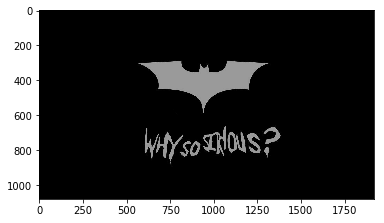

In [86]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

im = Image.open('img.jpg')
img_gr = im.convert("L") # Convert("L") translate color image into black and white

print("Original: %r" % img_gr)
arr = np.asarray(img_gr)
print("After conversion to numerical representation: %r: " % arr)

#PLOT
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
print("INPUT->GREYSCALE")
plt.show(imgplot)

<h4>Edge detector kernel</h4>

In [87]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - FEATURE MAP


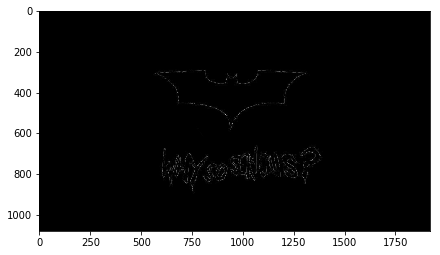

In [88]:
%matplotlib inline

print("GRADIENT MAGNITUDE - FEATURE MAP")

fig, aux = plt.subplots(figsize = (7,7))
aux.imshow(np.absolute(grad), cmap = 'gray')

Same thing but with a MNIST number image

Original: <PIL.Image.Image image mode=L size=181x181 at 0x2059365E748>
After conversion to numerical representation: array([[26, 14, 12, ..., 11, 11, 11],
       [ 0,  0,  1, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       ...,
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=uint8): 
INPUT->GREYSCALE


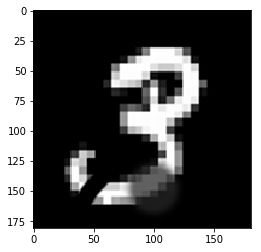

In [65]:
im = Image.open('num3.jpg')
img_gr = im.convert("L") # Convert("L") translate color image into black and white

print("Original: %r" % img_gr)
arr = np.asarray(img_gr)
print("After conversion to numerical representation: %r: " % arr)

#PLOT
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
print("INPUT->GREYSCALE")
plt.show(imgplot)

GRADIENT MAGNITUDE - Feature map


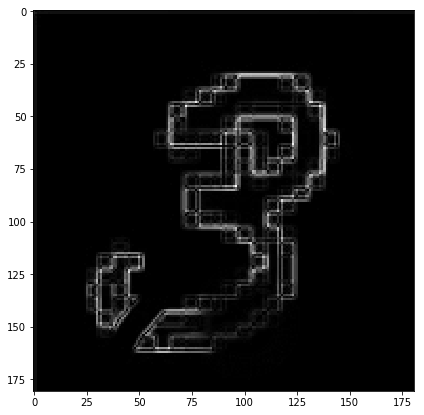

In [84]:
kernel = np.array([
                        [ -1, -1, -1],
                        [ -1,8, -1],
                        [ -1, -1, -1],
                                     ]) 
kernel2 = np.array([
                        [ 0,-1,0 ],
                        [ -1,5,-1 ],
                        [ 0,-1 ,0 ],
                                     ]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(7, 7))
aux.imshow(np.absolute(grad), cmap='gray')